In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [221]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC, LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost


In [3]:
import os
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets\titanic')

# EDA

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Gender

Sex
female    0.742038
male      0.188908
dtype: float64

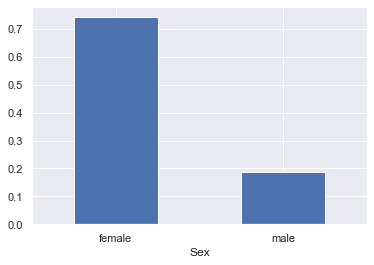

In [6]:
gender_survival_rate = train.groupby('Sex').apply(lambda df: df['Survived'].sum() / len(df))
gender_survival_rate.plot.bar(rot = 0)
gender_survival_rate

We can see that a women is far more likely to survive than a man

## Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

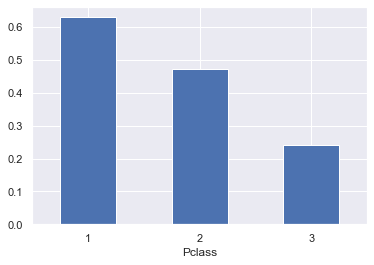

In [7]:
pclass_rate = train.groupby('Pclass').apply(lambda df: df['Survived'].sum() / len(df))
pclass_rate.plot(kind = 'bar', rot = 0)
pclass_rate

People in the upper class tend to survive

# Embarked

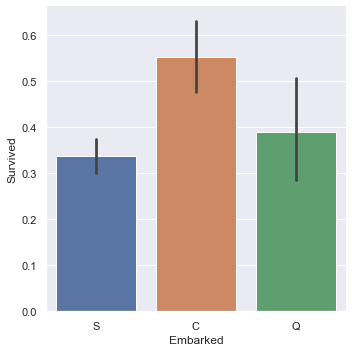

In [176]:
sns.catplot(data = train, x = 'Embarked', y = 'Survived', kind = 'bar')

It seems that passengers coming from C tend to survive

Let's see the Pclass distribution vs Embarked

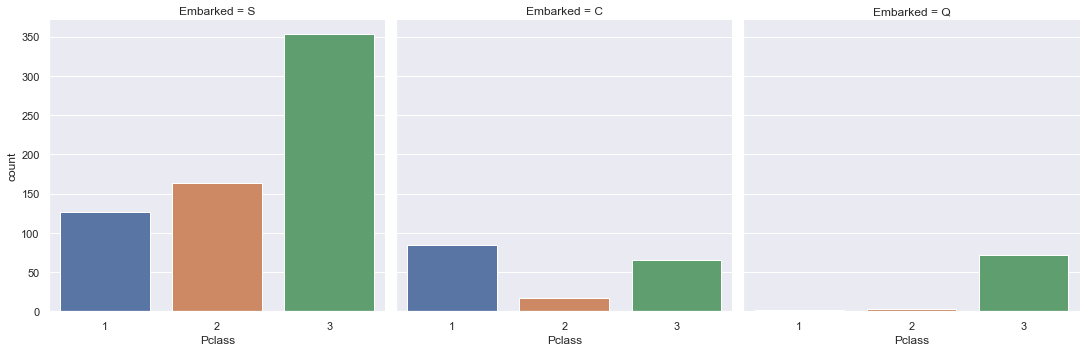

In [183]:
sns.catplot(data = train, x = 'Pclass', kind = 'count', col = 'Embarked')

## FamilySize

### SibSp

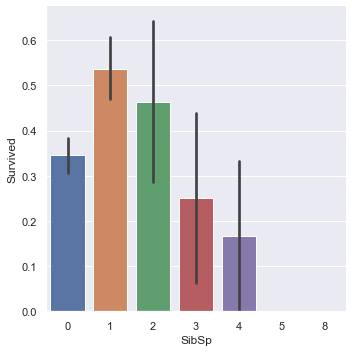

In [171]:
sns.catplot(data = train, x = 'SibSp', y = 'Survived', kind = 'bar')
sns.despine()

It seems that peple who have a large number of Siblings, Spouse rare to survive.<br>
People who go alone or with just 1 or 2 SibSp tend to survive

In [8]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
train['FamilySize'] = train['SibSp'] + train['Parch']
family_size_rate = train.groupby('FamilySize').apply(lambda df: df['Survived'].sum() / len(df))
family_size_rate

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
dtype: float64

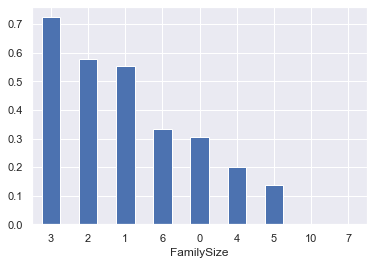

In [10]:
family_size_rate.sort_values(ascending=False).plot(kind = 'bar', rot = 0)

## Does a person go alone?

In [11]:
train['isAlone'] = (train['FamilySize'] == 0)
alone_survival_rate = train.groupby('isAlone').apply(lambda df: df['Survived'].sum() / len(df))
alone_survival_rate

isAlone
False    0.505650
True     0.303538
dtype: float64

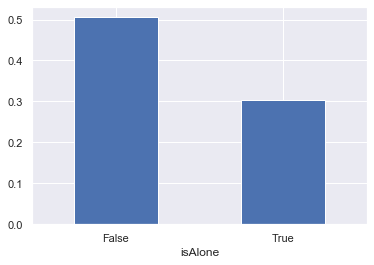

In [12]:
alone_survival_rate.plot(kind = 'bar', rot = 0)

## Binning Age

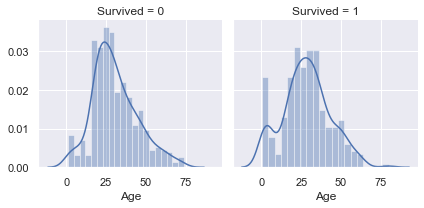

In [172]:
grid = sns.FacetGrid(data = train, col = 'Survived')
grid.map(sns.distplot, 'Age', bins = 20)

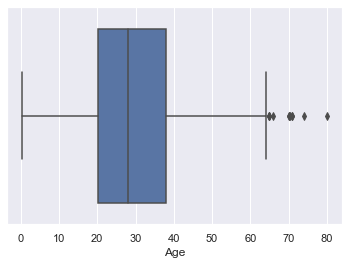

In [14]:
sns.boxplot(train['Age'])

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
bins = [0, 18, 40, 65, 80]
train['ageBin'] = pd.cut(train['Age'], bins)
train.groupby('ageBin')['Survived'].mean()

ageBin
(0, 18]     0.503597
(18, 40]    0.388235
(40, 65]    0.380282
(65, 80]    0.125000
Name: Survived, dtype: float64

In [17]:
train.groupby('ageBin').apply(lambda df: df['Survived'].sum() / len(df))

ageBin
(0, 18]     0.503597
(18, 40]    0.388235
(40, 65]    0.380282
(65, 80]    0.125000
dtype: float64

## Pearson map correlation

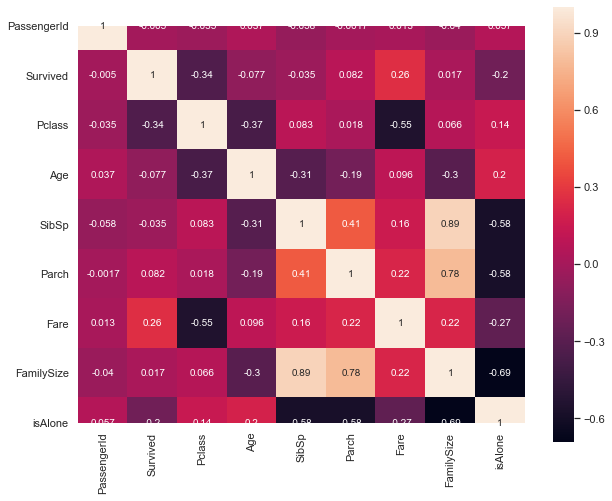

In [18]:
fig = plt.figure(figsize = (10, 8))
sns.heatmap(train.corr(), annot = True, square = True)

There are few features that are highly correlated

## Title in a person name

In [19]:
train['title'] = train['Name'].str.extract('([a-zA-Z]+)\.', expand = False)
train['title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: title, Length: 891, dtype: object

In [20]:
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Jonkheer      1
Ms            1
Don           1
Sir           1
Mme           1
Lady          1
Capt          1
Name: title, dtype: int64

We can see 4 major titles: <b>Mr, Miss, Mrs, Master</b>
Let's replace the other titles with 'Other'

In [22]:
major = train['title'].isin(['Mr.', 'Miss.', 'Mrs.', 'Master.'])
major.value_counts()

False    891
Name: title, dtype: int64

In [23]:
train['title'] = train['title'].where(major, 'Other')

In [24]:
train['title'].value_counts()

Other    891
Name: title, dtype: int64

In [25]:
train.groupby('title').apply(lambda df: df['Survived'].sum() / len(df))

title
Other    0.383838
dtype: float64

## Fare

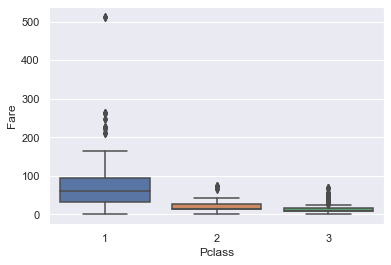

In [26]:
sns.boxplot(data = train, x = 'Pclass', y = 'Fare')

Do people who buy expensive fare tend to survive?

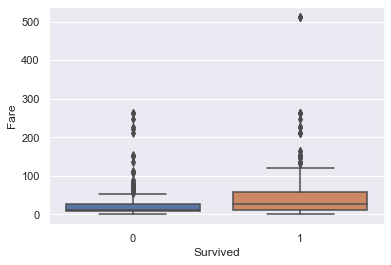

In [27]:
sns.boxplot(data = train, x = 'Survived', y = 'Fare')

what about binning Fare?

In [28]:
train['fareBin'] = pd.cut(train['Fare'], 4)
train.groupby('fareBin')['Survived'].mean()

fareBin
(-0.512, 128.082]     0.368113
(128.082, 256.165]    0.724138
(256.165, 384.247]    0.666667
(384.247, 512.329]    1.000000
Name: Survived, dtype: float64

<p class = 'note'>It seems like people who pay high price tickets tend to survive</p>

## Correlation of features with ouput

In [29]:
train.corrwith(train['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
FamilySize     0.016639
isAlone       -0.203367
dtype: float64

# Classification Algorithmn

## Preprocessing

In [30]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'isAlone', 'ageBin', 'title', 'fareBin'], dtype=object)

In [31]:
#Feature engineering
#Generate new features from a DataFrame
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X['FamilySize'] = X['SibSp'] + X['Parch']
        X['isAlone'] = X['FamilySize'] == 0
        X['title'] = X['Name'].str.extract('([a-zA-Z]+)\.', expand = False)
        X.loc[~X['title'].isin(['Mr', 'Miss', 'Mrs', 'Master']), 'title'] = 'Other'
        
        bins = [0, 18, 40, 65, 80]
        X['ageBin'] = pd.cut(X['Age'], bins)
        #Cut Fare into 4 bins
        X['fareBin'] = pd.cut(X['Fare'], 4)
        return X


In [32]:
#Select features from a DataFrame and convert the result to a numpy array
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.features]

In [33]:
#Impute missing categorical features with most frequent value in the DataFrame column
class CatImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        most_freq = [X[col].value_counts().index[0] for col in X]
        self.most_freq = most_freq
        return self
    def transform(self, X, y = None):
        for col, replace_val in zip(X, self.most_freq):
            X[col].fillna(replace_val, inplace = True)
        return X
        

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
isAlone        891 non-null bool
ageBin         714 non-null category
title          891 non-null object
fareBin        891 non-null category
dtypes: bool(1), category(2), float64(2), int64(6), object(6)
memory usage: 100.3+ KB


In [35]:
num_features = ['Age','Fare']
cat_features = ['Pclass', 'Sex', 'Embarked', 'isAlone', 'ageBin', 'title']

num_pipe = make_pipeline(
    FeatureSelector(num_features),
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    FeatureSelector(cat_features),
    CatImputer(),
    OneHotEncoder()
)

preprocess_pipe = FeatureUnion([
    ('num_pipe', num_pipe),
    ('cat_pipe', cat_pipe)
])


## Feature Engineering

In [36]:
X_train = train.drop(columns = 'Survived')
y_train = train['Survived']
X_test = test

X_train = FeatureGenerator().fit_transform(X_train)
X_test = FeatureGenerator().fit_transform(X_test)

In [37]:
#in the test set, there's an unknown category in the column 'title': 'Dona'
#it's rare, so let's replace it with 'Other'
X_test.loc[X_test['title'] == 'Dona', 'title'] = 'Other'

In [38]:
X_train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [39]:


X_train = preprocess_pipe.fit_transform(X_train)
X_test = preprocess_pipe.transform(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\dell\Anaconda3\lib\site-packages\pand


## Searching for the best model

### KNN

In [40]:
knn_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(3,10)}, cv = 5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(3, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
knn_grid.best_score_

0.8080808080808081

### Logistic Regression

In [42]:
log_grid = GridSearchCV(LogisticRegression(), {'C':[.001, .01, .1, 1, 10, 100]}, cv = 5)
log_grid.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
log_grid.best_score_

0.813692480359147

In [44]:
log_grid.score(X_train, y_train)

0.8226711560044894

### SVM

In [45]:
grid_params = {
    'C': [.001, .01, .1, 1, 10, 100, 1000],
    'gamma': [.001, .01, .1, 1, 10]
}
grid = GridSearchCV(SVC(), grid_params, cv = 5)
grid.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [47]:
grid.best_score_

0.8226711560044894

### Random Forest

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9820426487093153

### Gradient Boosting

In [49]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.9023569023569024

### Ensemble Learning

#### Stacking

Use 5 classifier:
<ul>
    <li>Random Forest</li>
    <li>Extra Tree</li>
    <li>Ada Boost</li>
    <li>Gradient Boost</li>
    <li>Support Vector Machine</li>
</ul>


<a href = 'https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python'>Ensemble learning - Kaggle</a>

In [152]:
N_FOLDS = 5
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]


def get_oof(clf):
    print('-' * 100)
    print(clf.__class__.__name__)
    folds = KFold(N_FOLDS).split(X_train)
    train_pred = np.zeros(N_TRAIN)
    #for each fold, train the model and make predictions on the test set
    #then average the results over n folds
    test_pred = np.zeros((N_FOLDS, N_TEST)) 
    print(folds)
    for i, (train_index, valid_index) in enumerate(folds):
        clf.fit(X_train[train_index], y_train[train_index])
        print(clf.score(X_train[train_index], y_train[train_index]))
        train_pred[valid_index] = clf.predict(X_train[valid_index])
        test_pred[i] = clf.predict(X_test)
        
    test_pred = test_pred.mean(0)
    return train_pred.reshape((-1,1)), test_pred.reshape((-1,1))
    

In [165]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.1
    }

In [166]:
rf = RandomForestClassifier(**rf_params)
et = ExtraTreesClassifier(**et_params)
ada = AdaBoostClassifier(**ada_params)
gb = GradientBoostingClassifier(**gb_params)
sv = SVC(**svc_params)

# rf = RandomForestClassifier()
# et = ExtraTreesClassifier()
# ada = AdaBoostClassifier()
# gb = GradientBoostingClassifier()
# sv = SVC()

In [167]:
models = [rf, et, ada, gb, sv]
preds = [get_oof(clf) for clf in models]
n_models = len(models)
first_level_train_prediction = np.concatenate([preds[i][0] for i in range(n_models)], axis = 1)
first_level_test_prediction = np.concatenate([preds[i][1] for i in range(n_models)], axis = 1)

----------------------------------------------------------------------------------------------------
RandomForestClassifier
<generator object _BaseKFold.split at 0x000001D762E79C00>
0.8623595505617978
0.8681626928471248
0.85273492286115
0.8653576437587658
0.8485273492286115
----------------------------------------------------------------------------------------------------
ExtraTreesClassifier
<generator object _BaseKFold.split at 0x000001D762E79C00>
0.8595505617977528
0.8709677419354839
0.85273492286115
0.8583450210378681
0.847124824684432
----------------------------------------------------------------------------------------------------
AdaBoostClassifier
<generator object _BaseKFold.split at 0x000001D762E79A20>
0.8707865168539326
0.8807854137447405
0.8695652173913043
0.8751753155680224
0.8709677419354839
----------------------------------------------------------------------------------------------------
GradientBoostingClassifier
<generator object _BaseKFold.split at 0x000001D762E7

In [160]:
#predictions of different models on each test data
df_pred = pd.DataFrame(first_level_train_prediction, columns = [model.__class__.__name__ for model in models])
df_pred

,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,SVC
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0


In [161]:
boost = xgboost.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

In [162]:
boost.fit(first_level_train_prediction, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.9,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=2000, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [168]:

boost.score(first_level_train_prediction, y_train)

0.8361391694725028

#### Voting

<a href = 'https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling'>Ensemble: Voting -- Kaggle</a>

<p class = 'note'>Ada boost best model</p>

In [197]:
ada_params = {'n_estimators': [50, 100, 250, 500],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

ada_grid = GridSearchCV(AdaBoostClassifier(), ada_params, cv = StratifiedKFold(5))
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           1.5],
                         'n_estimators': [50, 100, 250, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [198]:
ada_grid.best_score_

0.813692480359147

In [199]:
ada_grid.best_params_

{'learning_rate': 1.5, 'n_estimators': 250}

<p class = 'note'>Extra tree best model</p>

In [202]:
extra_params = {
    'n_estimators': [50, 100, 250, 500],
    'max_features': [2, 5, 10],
    'min_samples_split': [2,3,10],
    'min_samples_leaf':[1,3,10]
}
extra_grid = GridSearchCV(ExtraTreesClassifier(), extra_params, cv = StratifiedKFold(5))
extra_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
            

In [207]:
extra_grid.best_score_

0.8226711560044894

In [206]:
extra_grid.best_params_

{'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 250}

<p class = 'note'>SVC best model</p>

In [211]:
svc_params = {
    'C':[.001, .01, .1, 1, 10, 100],
    'gamma': [.001, .01, .1, 1, 10]
}
svc_grid = GridSearchCV(SVC(kernel = 'rbf', probability = True), svc_params, cv = StratifiedKFold(5))
svc_grid.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [212]:
svc_grid.best_score_

0.8226711560044894

In [213]:
svc_grid.best_params_

{'C': 100, 'gamma': 0.01}

<p class = 'note'>Random Forest best model</p>

In [214]:
rf_params = {
    'n_estimators': [100, 300],
    'max_features': [2, 5, 10],
    'min_samples_split': [2,3,10],
    'min_samples_leaf':[1,3,10]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = StratifiedKFold(5))
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
        

In [215]:
rf_grid.best_score_

0.8383838383838383

In [216]:
rf_grid.best_params_

{'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

<p class = 'note'>Gradient Boost best model</p>

In [218]:
gb_params = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv = StratifiedKFold(5))
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split...
                                                  presort='auto',
                                                  random_state=None,
                                                  subsample=1.0, tol=0.

In [219]:
gb_grid.best_score_

0.8316498316498316

In [220]:
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'max_features': 0.3,
 'min_samples_leaf': 100,
 'n_estimators': 300}

<p class = 'note'>Best model by ensembling all 5 models</p>

In [223]:
voting_model = VotingClassifier([
    ('extra', extra_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_),
    ('ada', ada_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_)
])
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('extra',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=5,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=10,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=250,
                                                   n_jobs=None, oob_score=False,
                   

In [224]:
voting_model.score(X_train, y_train)

0.8877665544332211

# Submission

We decide to use Random Forest as the final model to use:

In [50]:
rf_y_pred = rf.predict(X_test)

In [51]:
res = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': rf_y_pred
})


In [52]:
os.chdir(r'C:\\Users\\dell\\Data Science\\Kaggle')
os.getcwd()

'C:\\Users\\dell\\Data Science\\Kaggle'

In [53]:
res.to_csv('titanic_solution1.csv', index = False)

svc submission:

In [54]:
pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': grid.predict(X_test)
}).to_csv('titanic_solution_svm.csv', index = False)

XGboost submission:

In [164]:
boost_submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': boost.predict(first_level_test_prediction)
})
boost_submission.to_csv('titanic_solution_xgboost.csv', index = False)

Voting Submission:

In [225]:
voting_submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': voting_model.predict(X_test)
})
voting_submission.to_csv('titanic_solution_voting.csv', index = False)

# Reference

<a href = 'https://www.kaggle.com/startupsci/titanic-data-science-solutions'>Data Science solution</a>

In [55]:
from sklearn.model_selection import KFold
KFold?